<a id='pd'></a>  
# Pandas DataFrames

[Create](#pd-create)  
[Import](#pd-import)  
[Restructure](#pd-restructure)  
[Explore](#pd-explore)  
[Missing Data](#pd-missing)  
[Transform](#pd-transform)  
[Select](#pd-select)  
[Filter](#pd-filter)  
[Query](#pd-query)  
[Aggregate](#pd-aggregate)  
[Resample](#pd-resample)  
[Visualize](#pd-visualize)   
[Export](#pd-export)  

## Initialize

### libraries

In [1]:
import os
import calendar
import warnings
import pooch

import numpy as np

import pandas as pd 
from pandas.api.types import CategoricalDtype
#pd.__version__

import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns

### directories

In [2]:
home_dir = home_dir = os.path.expanduser("~")
work_dir = os.path.join(home_dir, 'kr')
data_dir = os.path.join(home_dir, 'kr', 'data') 
save_dir = os.path.join(home_dir, 'kr', 'save') 
os.chdir(work_dir)
os.getcwd()

'C:\\Users\\rick\\kr'

### parameters

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# shows result of cell without needing print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [5]:
sns.set(font_scale=1.5, style="darkgrid")

In [6]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [7]:
pd.set_option('display.max_rows',12)
#defaults: pd.set_option('display.max_columns',20,'display.max_rows',60,'display.max_colwidth',50)

### constants

In [8]:
months = [month for month in calendar.month_abbr if month]
months_cat = CategoricalDtype(months, ordered=True)

seasons = ['Spring', 'Summer', 'Autumn','Winter']
seasons_cat = CategoricalDtype(seasons, ordered=True)

CategoricalDtype(categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

In [9]:
# create dictionary to assign seasons to months
months_season_dict = {}
for i, month in enumerate(months):
    if i in (0, 1, 11):
        months_season_dict[month] = 'Winter'
    elif i in (2, 3, 4):
        months_season_dict[month] = 'Spring'
    elif i in (5, 6, 7):
        months_season_dict[month] = 'Summer'        
    elif i in (8, 9, 10):
        months_season_dict[month] = 'Autumn' 

### palettes

In [10]:
seasons_colors = ['orange','green','darkred','blue']
seasons_cmap = ListedColormap(seasons_colors)
print(seasons_cmap)

In [11]:
seaborn_viridis_palette = sns.color_palette("viridis_r",4)
seaborn_viridis_palette;

In [12]:
reds_color_palette = sns.color_palette("Reds",18);

In [13]:
anomaly_color_palette = reds_color_palette[6:];

<a id='pd-create'></a>
## Create

[Return to Start of Notebook](#pd)  

### series

### dataframe

<a id='pd-import'></a>
## Import

[Return to Start of Notebook](#pd)  

- skiprows  
- sep  
- usecols  
- parse_dates  
- index_col (can also use integer of column)
- na_values  
- nrows  

### url

In [14]:
giss_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/"

'https://data.giss.nasa.gov/gistemp/tabledata_v4/'

### global monthly

In [15]:
file_id = "GLB"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name
file_hash = '57e8f96856fec8743afb387d749c5d6e7a8ace8366dbdaf2a7aa755ac654819e'
file_path = pooch.retrieve(url=file_url,
                           known_hash=file_hash);

In [16]:
dfg = pd.read_csv(file_path, skiprows=1) # initial read for columns
dfg.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.08,-.16,-.09,-.20,-.17,-.09,-.14,-.23,-.21,-.17,-.16,***,***,-.11,-.16,-.19


In [17]:
cols_to_import = dfg.columns[0:13]; # start to end+1
dfg = pd.read_csv(file_path,
                  skiprows=1,
                  sep=',',
                  usecols=cols_to_import,
                  parse_dates=['Year'],
                  #index_col=0, # can use either  = 0, = 'Year'
                  na_values=['***'],
                  nrows=150)
dfg['Id'] = file_id
dfg.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Id
0,1880-01-01,-0.18,-0.24,-0.08,-0.16,-0.09,-0.2,-0.17,-0.09,-0.14,-0.23,-0.21,-0.17,GLB


### northern hemisphere monthly

In [18]:
file_id = "NH"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name
file_hash = '78d142ec78fb62b45f6910a63559693d858b356a401af8f9dd4359cc735a14c4'
file_path = pooch.retrieve(url=file_url,
                           known_hash=file_hash)
cols_to_import = dfg.columns[0:13]; # start to end+1
dfn = pd.read_csv(file_path,
                  skiprows=1,
                  sep=',',
                  usecols=cols_to_import,
                  parse_dates=['Year'],
                  #index_col=0, # can use either  = 0, = 'Year'
                  na_values=['***'],
                  nrows=150)
dfn['Id'] = file_id
dfn.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Id
0,1880-01-01,-0.36,-0.52,-0.23,-0.3,-0.06,-0.16,-0.18,-0.26,-0.23,-0.32,-0.43,-0.4,NH


### southern hemisphere monthly

In [19]:
file_id = "SH"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name
file_hash = '0e66e7a3bb70adf9cad26eb60492f3a21787921ffc1cc19c64071dd6c242aa2d'
file_path = pooch.retrieve(url=file_url,
                           known_hash=file_hash)
cols_to_import = dfg.columns[0:13]; # start to end+1
dfs = pd.read_csv(file_path,
                  skiprows=1,
                  sep=',',
                  usecols=cols_to_import,
                  parse_dates=['Year'],
                  #index_col=0, # can use either  = 0, = 'Year'
                  na_values=['***'],
                  nrows=150)
dfs['Id'] = file_id
dfs.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Id
0,1880-01-01,0.01,0.04,0.07,-0.01,-0.12,-0.24,-0.16,0.07,-0.04,-0.14,0.01,0.06,SH


### zonal annual

<a id='pd-restructure'></a>
## Restructure

[Return to Start of Notebook](#pd)  

### .melt

In [20]:
dfgt = pd.melt(dfg,
               id_vars=['Id','Year'],
               var_name=['Month'],
               value_name='Anomaly')
dfgt.head(1)

,Id,Year,Month,Anomaly
0,GLB,1880-01-01,Jan,-0.18


In [21]:
dfnt = pd.melt(dfn,
               id_vars=['Id','Year'],
               var_name=['Month'],
               value_name='Anomaly')
dfnt.head(1)

,Id,Year,Month,Anomaly
0,NH,1880-01-01,Jan,-0.36


In [22]:
dfst = pd.melt(dfs,
               id_vars=['Id','Year'],
               var_name=['Month'],
               value_name='Anomaly')
dfst.head(1)

,Id,Year,Month,Anomaly
0,SH,1880-01-01,Jan,0.01


### .pivot

In [23]:
dfgp = dfgt.pivot(index='Year',
                  columns='Month',
                  values='Anomaly')
dfgp.head(1)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1880-01-01,-0.16,-0.09,-0.17,-0.24,-0.18,-0.17,-0.2,-0.08,-0.09,-0.21,-0.23,-0.14


### .concat

#### stack vertically

In [24]:
dfgt.shape

(1716, 4)

In [25]:
dfm = pd.concat([dfgt,dfnt,dfst])
dfm.shape

(5148, 4)

#### stack horizontally

In [26]:
df1 = dfnt.loc[:,['Year','Anomaly']]
df1.rename(columns={'Anomaly':'N_Anomaly'},inplace=True)
df2 = dfst.loc[:,['Anomaly']]
df2.rename(columns={'Anomaly':'S_Anomaly'},inplace=True)

pd.concat([df1,df2],axis=1).head(1) # stack horizontally

,Year,N_Anomaly,S_Anomaly
0,1880-01-01,-0.36,0.01


### .merge

- only joins dfs horizontally
- only exactly two dfs
- has options for inner, left, right, outer, cross
- can use any columns to match the dfs

In [27]:
dfj = dfnt.merge(dfst,
                 how='inner',
                 on = ['Year','Month'])
dfj.head(3)

,Id_x,Year,Month,Anomaly_x,Id_y,Anomaly_y
0,NH,1880-01-01,Jan,-0.36,SH,0.01
1,NH,1881-01-01,Jan,-0.31,SH,-0.07
2,NH,1882-01-01,Jan,0.26,SH,0.08


In [28]:
dfj.shape

(1716, 6)

In [29]:
dfj = dfnt.merge(dfst,
                 how='left',
                 on = ['Year','Month'],
                 indicator=True)
dfj.head(3)

,Id_x,Year,Month,Anomaly_x,Id_y,Anomaly_y,_merge
0,NH,1880-01-01,Jan,-0.36,SH,0.01,both
1,NH,1881-01-01,Jan,-0.31,SH,-0.07,both
2,NH,1882-01-01,Jan,0.26,SH,0.08,both


In [30]:
# using common index
df1 = dfnt.set_index('Year')
df2 = dfst.set_index('Year')
j = df1.merge(df2, how='inner', left_index=True, right_index=True)
j.head(3)

,Id_x,Month_x,Anomaly_x,Id_y,Month_y,Anomaly_y
Year,,,,,,
1880-01-01,NH,Jan,-0.36,SH,Jan,0.01
1880-01-01,NH,Jan,-0.36,SH,Feb,0.04
1880-01-01,NH,Jan,-0.36,SH,Mar,0.07


<a id='pd-explore'></a>
## Explore

[Return to Start of Notebook](#pd)   

Minimally sufficient pandas:  
- attributes  
  - shape, dtypes, columns, index, values  
- methods
  - isna, notna, idxmax, idxmin, nunique, value_counts
- other 
  - info, len, unique

### .info
df.info(memory_usage='deep')

In [31]:
dfgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Id       1716 non-null   object        
 1   Year     1716 non-null   datetime64[ns]
 2   Month    1716 non-null   object        
 3   Anomaly  1707 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 53.8+ KB


### .shape

In [32]:
dfgt.shape

(1716, 4)

In [33]:
nrows = dfgt.shape[0]
ncols = dfgt.shape[1]
print(nrows)
print(ncols)

1716
4


### len()

In [34]:
nrows = len(dfgt)

1716

### .dtypes
returns series

In [35]:
dfgt.dtypes

Id                 object
Year       datetime64[ns]
Month              object
Anomaly           float64
dtype: object

### .columns

In [36]:
cols = dfgt.columns

Index(['Id', 'Year', 'Month', 'Anomaly'], dtype='object')

### .index 

#### index type

In [37]:
type(dfgt.index)

pandas.core.indexes.range.RangeIndex

#### index name

In [38]:
dfgt.index.name

#### index min, max

In [39]:
x = dfgt.index.min()
y = dfgt.index.max()
print(x,y)

0 1715


### .values

- pandas has separate numpy arrays for each data type in the df  
- when you access the values attribute, it concatenates them into a single array

#### values type

values returns a numpy array which can be used to improve performance when selecting single values

In [40]:
type(dfgt.values)

numpy.ndarray

#### values array

In [41]:
dfgt.values

array([['GLB', Timestamp('1880-01-01 00:00:00'), 'Jan', -0.18],
       ['GLB', Timestamp('1881-01-01 00:00:00'), 'Jan', -0.19],
       ['GLB', Timestamp('1882-01-01 00:00:00'), 'Jan', 0.17],
       ...,
       ['GLB', Timestamp('2020-01-01 00:00:00'), 'Dec', 0.81],
       ['GLB', Timestamp('2021-01-01 00:00:00'), 'Dec', 0.86],
       ['GLB', Timestamp('2022-01-01 00:00:00'), 'Dec', nan]],
      dtype=object)

### .nunique
(dropna=False) to include Nan in total

In [42]:
dfgt.nunique()

Id           1
Year       143
Month       12
Anomaly    179
dtype: int64

### .unique  
only available to series, not df

In [43]:
unique_months = dfgt['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### .value_counts  
The value_counts method is one of the most valuable methods for string columns.  
`df.value_counts(['col1','col2'],ascending=False,normalize=True).round(n)`

In [44]:
vc = dfgt.value_counts('Month', ascending=True)
#vc = dfgt['Month'].value_counts(sort=True,normalize=True).round(3) # normalize
#vc = dfgt['Month'].value_counts().index[0]; # most frequent value

Month
Apr    143
Aug    143
Dec    143
Feb    143
Jan    143
Jul    143
Jun    143
Mar    143
May    143
Nov    143
Oct    143
Sep    143
dtype: int64

### .describe

In [45]:
dfgt.describe()
#dfgt.describe().T # transpose with .T
#dfgt.describe(percentiles=[.1, .2, .5, .8, .9, .99]).T
#dfgt.describe(include='object')

,Anomaly
count,1707.000000
mean,0.055647
std,0.379280
min,-0.810000
25%,-0.220000
50%,-0.040000
75%,0.270000
max,1.370000


### .corr

### .highlight
requires dataframe, not series: use [[ ]] 

In [46]:
dfgt[['Anomaly']].head(5).style.format() \
    .highlight_max(color='yellow') \
    .highlight_min(color='lightblue')

,Anomaly
0,-0.180000
1,-0.190000
2,0.170000
3,-0.280000
4,-0.120000


<a id='pd-missing'></a>
## Missing data

[Return to Start of Notebook](#pd)  

### .isna.sum()

In [47]:
dfgc = dfgt.copy()
dfgt.isna().sum().head(5) # count by column

#dfgt.isna().sum().sum() # total in df
#dfgt.isna().sum(axis=1) # count by row (sort first)

Id         0
Year       0
Month      0
Anomaly    9
dtype: int64

### .isna.any()

In [48]:
filt = dfgt.isna().any(axis=1)
na_recs = dfgt.loc[filt]
na_recs.head(3)

,Id,Year,Month,Anomaly
571,GLB,2022-01-01,Apr,NaN
714,GLB,2022-01-01,May,NaN
857,GLB,2022-01-01,Jun,NaN


### .notna

In [49]:
filt = dfgt.notna()
sel = dfgt[filt]
sel.tail(3)

,Id,Year,Month,Anomaly
1713,GLB,2020-01-01,Dec,0.81
1714,GLB,2021-01-01,Dec,0.86
1715,GLB,2022-01-01,Dec,NaN


### .dropna

In [50]:
dfgt.dropna(inplace=True) # use axis=1 to drop columns
dfgp.dropna(thresh=3); # row must have at least 4 not null values

### .fillna

#### specify fill value

In [51]:
fill_value = round(dfgc.median(numeric_only=True),2) # median
fill_value = round(dfgc.mean(numeric_only=True),2) # mean
fill_value = 0 # constant
df_filled = dfgc.fillna(fill_value) 
df_filled .iloc[-1]

Id                         GLB
Year       2022-01-01 00:00:00
Month                      Dec
Anomaly                    0.0
Name: 1715, dtype: object

#### use dictionary

In [52]:
df_filled = dfgc.fillna({'Anomaly': fill_value}) # use for multiple columns and values
df_filled .iloc[-1]

Id                         GLB
Year       2022-01-01 00:00:00
Month                      Dec
Anomaly                    0.0
Name: 1715, dtype: object

#### ffill and bfill methods

In [53]:
df_filled = dfgc.fillna(method='ffill') # use previous value
#df_filled = dfgc.fillna(method='bfill') # use following value
df_filled.tail(2)

,Id,Year,Month,Anomaly
1714,GLB,2021-01-01,Dec,0.86
1715,GLB,2022-01-01,Dec,0.86


#### interpolate

In [54]:
count_na = dfgc.isna().sum().sum()

9

In [55]:
dfgt.tail()

,Id,Year,Month,Anomaly
1710,GLB,2017-01-01,Dec,0.94
1711,GLB,2018-01-01,Dec,0.92
1712,GLB,2019-01-01,Dec,1.09
1713,GLB,2020-01-01,Dec,0.81
1714,GLB,2021-01-01,Dec,0.86


In [56]:
dfgc['Anomaly']= dfgc['Anomaly'].interpolate('linear')
dfgc.tail()

,Id,Year,Month,Anomaly
1711,GLB,2018-01-01,Dec,0.92
1712,GLB,2019-01-01,Dec,1.09
1713,GLB,2020-01-01,Dec,0.81
1714,GLB,2021-01-01,Dec,0.86
1715,GLB,2022-01-01,Dec,0.86


<a id='pd-transform'></a>
## Transform

[Return to Start of Notebook](#pd)  

### .rename

### .map

In [57]:
dfgt['Season'] = dfgt['Month'].map(months_season_dict)  
dfgt.head(3)

,Id,Year,Month,Anomaly,Season
0,GLB,1880-01-01,Jan,-0.18,Winter
1,GLB,1881-01-01,Jan,-0.19,Winter
2,GLB,1882-01-01,Jan,0.17,Winter


### .astype 
- .astype('float64')
- .astype('int64') # cannot hold nulls
- .astype('bool') # cannot hold nulls
- .astype('str')
- .astype(categorical)

In [58]:
# convert month and season columns to categorical types
dfgt['Month'] = dfgt['Month'].astype(months_cat)
dfgt['Season'] = dfgt['Season'].astype(seasons_cat)
dfgt.head(3)

,Id,Year,Month,Anomaly,Season
0,GLB,1880-01-01,Jan,-0.18,Winter
1,GLB,1881-01-01,Jan,-0.19,Winter
2,GLB,1882-01-01,Jan,0.17,Winter


### .sort_values

In [59]:
dfgt.sort_values(by=['Year','Month'],inplace=True)
dfgt.head(3)

,Id,Year,Month,Anomaly,Season
0,GLB,1880-01-01,Jan,-0.18,Winter
143,GLB,1880-01-01,Feb,-0.24,Winter
286,GLB,1880-01-01,Mar,-0.08,Spring


### .diff

In [60]:
dfgt['Anomaly'] \
    .diff() \
    .nlargest()

198     0.47
41      0.41
311     0.38
1632    0.37
396     0.36
Name: Anomaly, dtype: float64

### .pct_change

### .cum max,min,sum

### .str accessor
- .str.lower(), .upper(), .capitalize()
- .str.len()
- .str.count('a')
- .str.replace('x','y')
- .str.split(',')
- .str[0] first char
- .str.contains('x') > 0 (filter)
- .str.startswith('x'), .endswith('x') (filter)

### .dt

In [61]:
dfcp = dfgt.copy()
dfcp['lower'] = dfcp['Season'].str.lower()
dfcp['upper'] = dfcp['Season'].str.upper()
dfcp['capitalize'] = dfcp['Season'].str.capitalize()
dfcp['len'] = dfcp['Season'].str.len()
dfcp['s3'] = dfgt['Season'].str[0:3]
dfcp['m1'] = dfgt['Month'].str[0]
dfcp.head(1)

,Id,Year,Month,Anomaly,Season,lower,upper,capitalize,len,s3,m1
0,GLB,1880-01-01,Jan,-0.18,Winter,winter,WINTER,Winter,6,Win,J


#### .dt accessor

In [62]:
dfcp = dfgt.copy().reset_index()
dfcp['year'] = dfcp['Year'].dt.year
dfcp['month'] = dfcp['Year'].dt.month
dfcp['day'] = dfcp['Year'].dt.day
dfcp['month_name'] = dfcp['Year'].dt.month_name()
dfcp.head(1)

,index,Id,Year,Month,Anomaly,Season,year,month,day,month_name
0,0,GLB,1880-01-01,Jan,-0.18,Winter,1880,1,1,January


#### .dt.strftime

In [63]:
dfgt['year_str'] = dfgt['Year'].dt.strftime('%Y') # create year string

In [64]:
dfcp = dfgt.copy().reset_index()
dfcp['%b'] = dfcp['Year'].dt.strftime('%b')
dfcp['%Y'] = dfcp['Year'].dt.strftime('%Y')
dfcp['%y'] = dfcp['Year'].dt.strftime('%y')
dfcp['%m'] = dfcp['Year'].dt.strftime('%m')
dfcp['%d'] = dfcp['Year'].dt.strftime('%d')
dfcp.head(1)

,index,Id,Year,Month,Anomaly,Season,year_str,%b,%Y,%y,%m,%d
0,0,GLB,1880-01-01,Jan,-0.18,Winter,1880,Jan,1880,1880-01-01 00:00:00,01,01


#### .dt.to_period
- A period is a special data type unique to pandas (it don't exist in numpy) 
- it represents an entire period of time such as the entire month  
- this contrasts with datetimes which represent a single moment in time

In [65]:
dfcp = dfgt.copy().reset_index()
dfcp['month-period'] = dfcp['Year'].dt.to_period('M')
dfcp['year-period'] = dfcp['Year'].dt.to_period('Y')
dfcp['year-period-start'] = dfcp['year-period'].dt.start_time
dfcp['year-period-end'] = dfcp['year-period'].dt.end_time
dfcp.dtypes
dfcp.head(1)

,index,Id,Year,Month,Anomaly,Season,year_str,month-period,year-period,year-period-start,year-period-end
0,0,GLB,1880-01-01,Jan,-0.18,Winter,1880,1880-01,1880,1880-01-01,1880-12-31 23:59:59.999999999


### .to_datetime

In [66]:
dfgt['month_str'] = pd.to_datetime(dfgt['Month'], format='%b').dt.strftime('%m') # create month string

In [67]:
dfgt['date'] = pd.to_datetime(dfgt['year_str'] + dfgt['month_str'], format='%Y%m') # combine strings and convert to date
dfgt.head(1)

,Id,Year,Month,Anomaly,Season,year_str,month_str,date
0,GLB,1880-01-01,Jan,-0.18,Winter,1880,01,1880-01-01


### .date_range

### .index

#### .set_index

In [68]:
dfgt.set_index('date',inplace=True, verify_integrity=True, drop=True)
dfgt.head(1)

,Id,Year,Month,Anomaly,Season,year_str,month_str
date,,,,,,,
1880-01-01,GLB,1880-01-01,Jan,-0.18,Winter,1880,01


#### .index.names=

In [69]:
dfgt.index.names = ['Date']
dfgt.head(1)

,Id,Year,Month,Anomaly,Season,year_str,month_str
Date,,,,,,,
1880-01-01,GLB,1880-01-01,Jan,-0.18,Winter,1880,01


#### .reset_index

In [70]:
dfgp.reset_index(inplace=True)
dfgp.head(1)

Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1880-01-01,-0.16,-0.09,-0.17,-0.24,-0.18,-0.17,-0.2,-0.08,-0.09,-0.21,-0.23,-0.14


In [71]:
dfgp.set_index('Year',inplace=True,drop=True)
dfgp.head(1)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1880-01-01,-0.16,-0.09,-0.17,-0.24,-0.18,-0.17,-0.2,-0.08,-0.09,-0.21,-0.23,-0.14


#### .index. date accessor
(cannot use .dt)

In [72]:
dfgt['Year'] = dfgt.index.year # add Year column
dfgt.head(1)

,Id,Year,Month,Anomaly,Season,year_str,month_str
Date,,,,,,,
1880-01-01,GLB,1880,Jan,-0.18,Winter,1880,01


#### .sort_index

In [73]:
#dfgt.sort_index(ascending=False,inplace=True)
dfgt.sort_index(inplace=True)
dfgt.head(3)

,Id,Year,Month,Anomaly,Season,year_str,month_str
Date,,,,,,,
1880-01-01,GLB,1880,Jan,-0.18,Winter,1880,01
1880-02-01,GLB,1880,Feb,-0.24,Winter,1880,02
1880-03-01,GLB,1880,Mar,-0.08,Spring,1880,03


### .rank
- returns the ranking of each column, does not sort
- methods to handle ties:
  - average - default, ranks are average of ties
  - dense - ties given same rank, no numbers skipped
  - min - give each tie the minimum rank integer
  - max - give each tie the maximum rank number
  - first - arbitrarily give the tie that comes first in the dataset the lower/higher number.

In [74]:
dfcp = dfgt.copy()
dfcp[['Anomaly']].rank().tail(3)
dfcp[['Anomaly']].rank(ascending=False).tail(3)
dfcp[['Anomaly']].rank(ascending=False, method='dense').tail(3)

,Anomaly
Date,
2022-01-01,21.0
2022-02-01,23.0
2022-03-01,12.0


### .drop_duplicates
- returns unique values 

In [75]:
dfgc = dfgt.copy()
dfgc = dfgc[['Season','Month']].drop_duplicates(keep='last') # keep = first, last, False
dfgc.head(3)

,Season,Month
Date,,
2021-04-01,Spring,Apr
2021-05-01,Spring,May
2021-06-01,Summer,Jun


### .apply

In [76]:
dfcp = dfgt.copy()
dfcp['anomaly_f'] =  dfcp['Anomaly'].apply(lambda x: x * 1.8) # by column
dfcp.head(1)

,Id,Year,Month,Anomaly,Season,year_str,month_str,anomaly_f
Date,,,,,,,,
1880-01-01,GLB,1880,Jan,-0.18,Winter,1880,01,-0.324


In [77]:
dfcp = dfgp.copy()
dfcp['any_gt_1'] =  dfgp.apply(lambda x: any(x > 0), axis = 1) # by row
dfcp.head(2)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,any_gt_1
Year,,,,,,,,,,,,,
1880-01-01,-0.16,-0.09,-0.17,-0.24,-0.18,-0.17,-0.20,-0.08,-0.09,-0.21,-0.23,-0.14,False
1881-01-01,0.06,-0.03,-0.06,-0.13,-0.19,0.01,-0.18,0.04,0.07,-0.18,-0.21,-0.15,True


### .drop

#### rows

In [78]:
dropindex = dfgp.index[-1]
dfgp.drop(index=dropindex, inplace=True);
dfgp.tail(1)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2021-01-01,0.76,0.81,0.86,0.64,0.81,0.92,0.85,0.88,0.79,0.93,0.99,0.92


#### columns

In [79]:
cols = ['year_str', 'month_str']
dfgt.drop(columns=cols,inplace=True) # drop unneeded columns
dfgt.head(3)

,Id,Year,Month,Anomaly,Season
Date,,,,,
1880-01-01,GLB,1880,Jan,-0.18,Winter
1880-02-01,GLB,1880,Feb,-0.24,Winter
1880-03-01,GLB,1880,Mar,-0.08,Spring


### columns

#### add column

In [80]:
dfgt['Id'] = 'GLB'
dfgt.head(1)

,Id,Year,Month,Anomaly,Season
Date,,,,,
1880-01-01,GLB,1880,Jan,-0.18,Winter


#### reorder columns

In [81]:
dfgt = dfgt[['Id','Year','Season','Month','Anomaly']];  # reorder columns
dfgt.head(3)

,Id,Year,Season,Month,Anomaly
Date,,,,,
1880-01-01,GLB,1880,Winter,Jan,-0.18
1880-02-01,GLB,1880,Winter,Feb,-0.24
1880-03-01,GLB,1880,Spring,Mar,-0.08


<a id='pd-select'></a>
## Select

[Return to Start of Notebook](#pd)  

- columns with brackets []
- by label  .loc
- by integer location  .iloc
- using slice notation :

### columns

In [82]:
scol= 'Anomaly'
scol1= ['Anomaly']
scols = ['Month','Anomaly']

icol = 4
icol1 = [4]
icols = [3,4];

In [83]:
selection = dfgt[scol] # single column as series (brackets)
selection = dfgt.iloc[:,icol] # single column as series (iloc)
selection = dfgt[scol1] # single column as df (brackets)
selection = dfgt.iloc[:,icol1] # single column as df (iloc)

selection = dfgt[scols] # multiple columns (brackets)
selection = dfgt.iloc[:,icols] # multiple columns (iloc)
selection = dfgt.iloc[:,3:5] # multiple columns (slice notation)

selection = dfgt.select_dtypes('float64') # by date type
selection = dfgt.select_dtypes('int64') # by date type
selection = dfgt.select_dtypes('number') # by date type
selection = dfgt.select_dtypes('object') # by date type
selection = dfgt.select_dtypes('category') # by date type

selection = dfgp.sample(2, axis='columns'); # random sammple

### rows

In [84]:
srow = '1900-01-01'
srow1 = ['1900-01-01']
srows = ['1900-01-01','1910-01-01']

irow = 0
irow1 = [0]
irows = [0,1];

In [85]:
selection = dfgt.head(10)
selection = dfgt.tail(10)

selection = dfgt.loc[srow] # single row as series (loc)
selection = dfgt.iloc[irow] # single row as series (iloc)
selection = dfgt.loc[srow1] # single row as df (loc)
selection = dfgt.iloc[icol1] # single row as df (iloc)
selection = dfgt.loc['1880'] # single row as df partial date specification

selection = dfgt.loc[srows] # multiple rows (loc)
selection = dfgt.iloc[irows] # multiple rows (iloc)
selection = dfgt.loc['2000':'2020'] # multiple rows (slice notation)
selection = dfgt.iloc[0:3] # multiple rows (slice notation)

selection = dfgt.sample(2) # random sample
selection = dfgt.sample(frac=.10); # random sample fraction of rows
selection = dfgt.sample(2, random_state = 12345) # random sample defined id
selection = dfgt.sample(2, replace=True); # random sample with replacement

### rows and columns

In [86]:
selection = dfgt.loc[srows,scols] # loc
selection = dfgt.iloc[irows,icols] # iloc

selection = dfgp.loc[srows, 'Jan':'Mar'] # loc slice notation
selection = dfgt.loc['1900':'1902', scols] # loc slice notation
selection = dfgp.loc['1900':'1902', 'Jan':'Mar'] # loc slice notation

selection = dfgt.iloc[irows, 1:3]
selection = dfgt.iloc[0:3, icols]
selection = dfgt.iloc[0:3, 1:3]

selection = dfgt.iloc[:, icols]; # all rows with slice notation

### single value

In [87]:
selection = dfgp.loc['1900','Jan'] # as series
selection = dfgt.iloc[-3,0] # as value
selection = dfgt.loc[srow1,scol1] # as df
selection = float(dfgp.loc['1900','Jan']) # as float
selection = dfgt.values[5,1] # numpy values for improved performance

1880

### using date index

In [88]:
#selection = dfgt['2018-01-01':'2019-01-01']
selection = dfgt['2018':'2019']
selection.head(3)

,Id,Year,Season,Month,Anomaly
Date,,,,,
2018-01-01,GLB,2018,Winter,Jan,0.81
2018-02-01,GLB,2018,Winter,Feb,0.84
2018-03-01,GLB,2018,Spring,Mar,0.88


<a id='pd-filter'></a>
## Filter

[Return to Start of Notebook](#pd)  

* Process of selecting rows based on values, not labels or integer locations.
* also known as boolean selection and boolean indexing  
* pandas defaults to boolean selection if contents of brackets is list of booleans
* operators  >, <, ==, !=, >=, <=  
* if also selecting specific columns, must use .loc
* boolean selection does not work with .iloc

### using date index

In [89]:
filt = dfgt.index == '2018-01-01'
filt = dfgt.index > '2018-01-01'
filt = dfgt.index.year == 1990
dfgt[filt].head(3)

,Id,Year,Season,Month,Anomaly
Date,,,,,
1990-01-01,GLB,1990,Winter,Jan,0.41
1990-02-01,GLB,1990,Winter,Feb,0.44
1990-03-01,GLB,1990,Spring,Mar,0.80


### using column values

In [90]:
filt = dfgt["Anomaly"] >= 1.0
selection = dfgt.loc[filt].head(3)

,Id,Year,Season,Month,Anomaly
Date,,,,,
2007-01-01,GLB,2007,Winter,Jan,1.02
2015-10-01,GLB,2015,Autumn,Oct,1.10
2015-11-01,GLB,2015,Autumn,Nov,1.06


In [91]:
filt = dfgt["Season"]=="Winter"
winter_temps = dfgt[['Month','Anomaly']].loc[filt]
winter_temps.head(3)

,Month,Anomaly
Date,,
1880-01-01,Jan,-0.18
1880-02-01,Feb,-0.24
1880-12-01,Dec,-0.17


In [92]:
filt = dfgp['Jan'] > dfgp['Mar']
dfgp[['Jan','Mar']][filt].head(3)

Month,Jan,Mar
Year,,
1882-01-01,0.17,0.05
1884-01-01,-0.12,-0.36
1888-01-01,-0.34,-0.41


### multiple conditions

In [93]:
filt1 = dfgt["Anomaly"] > 1.1
filt2 = dfgt["Anomaly"] < 1.2
selection = dfgt.loc[filt1 & filt2].head(3) # and
#selection = dfgp.loc[filt1 | filt2] # or
#selection = dfgp.loc[~filt1]; # not

,Id,Year,Season,Month,Anomaly
Date,,,,,
2015-12-01,GLB,2015,Winter,Dec,1.16
2016-01-01,GLB,2016,Winter,Jan,1.17
2016-04-01,GLB,2016,Spring,Apr,1.11


### between

In [94]:
filt3 = dfgp["Jan"].between(1.02,1.2)
filt3 = dfgp["Jan"].between(1.02,2,inclusive='both')
filt3 = dfgp["Jan"].between(1.02,2,inclusive='neither')
selection = dfgp.loc[filt3]; # between

### isin

In [95]:
filt = dfgt.index.year.isin([2020,2020])
selection = dfgt.loc[filt].head(2);

### count boolean values

In [96]:
filt = dfgp['Jan'] > 1.0
count_true = sum(filt) # count

4

### average boolean values

In [97]:
filt.mean() * 100 # as percent

2.8169014084507045

### .idxmax, .idxmin

In [98]:
imax = dfgt['Anomaly'].idxmax()
dfgt.loc[[imax],:]

,Id,Year,Season,Month,Anomaly
Date,,,,,
2016-02-01,GLB,2016,Winter,Feb,1.37


In [99]:
imax = dfgt['Anomaly'].idxmax()
imin = dfgt['Anomaly'].idxmin()
max_min_idx = [imax, imin]
dfgt.loc[max_min_idx,:]

,Id,Year,Season,Month,Anomaly
Date,,,,,
2016-02-01,GLB,2016,Winter,Feb,1.37
1893-01-01,GLB,1893,Winter,Jan,-0.81


### .nlargest, .nsmallest  
- keep = 'first' is default  
- keep = 'last' will instead keep last  
- keep = 'all' wiil keep all tied values

In [100]:
selection = dfgt['Anomaly'].nlargest(n=3) # as series
#selection = dfgt['Anomaly'].nsmallest(n=3) # as series
#selection = dfgt.nlargest(3, 'Anomaly') # as df
#selection = dfgt['Anomaly'].nlargest(n = 3, keep = 'all') # keep ties

Date
2016-02-01    1.37
2016-03-01    1.36
2020-02-01    1.24
Name: Anomaly, dtype: float64

### chaining

In [101]:
# max for each season
months_sorted = dfgt[['Season','Anomaly']] \
    .sort_values('Anomaly',ascending=False) \
    .drop_duplicates(subset=['Season'])

,Season,Anomaly
Date,,
2016-02-01,Winter,1.37
2016-03-01,Spring,1.36
2020-11-01,Autumn,1.11
2016-08-01,Summer,1.02


In [102]:
dfgt['Anomaly'].diff().nlargest()

Date
1935-02-01    0.47
1921-01-01    0.41
1905-03-01    0.38
1939-12-01    0.37
1990-03-01    0.36
Name: Anomaly, dtype: float64

<a id='pd-query'></a>
## Query

[Return to Start of Notebook](#pd)  

- recommended over boolean selection
- however, does not cover all options that boolean selection has

In [103]:
sel = dfgp.query('Jan > 1')
sel = dfgp.query('Jan > 1 and Feb < 1')
sel = dfgp.query('Jan > 1.2 or Feb > 1.2')
sel = dfgp.query('1 < Jan < 1.1')
sel = dfgp.query('Jan > Mar').head(3) # compare columns
sel = dfgp.query('Year == 2000') # uses year from Datetime index
sel = dfgp.query('Year in ["1880-01-01", "1980-01-01"]')

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1880-01-01,-0.16,-0.09,-0.17,-0.24,-0.18,-0.17,-0.20,-0.08,-0.09,-0.21,-0.23,-0.14
1980-01-01,0.30,0.19,0.22,0.40,0.30,0.22,0.21,0.30,0.35,0.30,0.13,0.20


### @variable

In [104]:
max_val = 1.0
sel = dfgp.query('Jan > @max_val')

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2007-01-01,0.76,0.60,0.49,0.70,1.02,0.60,0.61,0.73,0.69,0.58,0.58,0.60
2016-01-01,1.11,1.02,0.87,1.37,1.17,0.85,0.80,1.36,0.95,0.91,0.89,0.90
2017-01-01,0.94,0.87,0.94,1.14,1.02,0.82,0.72,1.16,0.91,0.88,0.90,0.77
2020-01-01,1.13,0.87,0.81,1.24,1.16,0.90,0.92,1.17,1.02,1.11,0.89,0.99


### specify columns

In [105]:
cols = ['Apr','Jun']
sel = dfgp.query('Jan > 1')[cols].head(3)

Month,Apr,Jun
Year,,
2007-01-01,0.76,0.61
2016-01-01,1.11,0.80
2017-01-01,0.94,0.72


<a id='pd-aggregate'></a>
## Aggregate

[Return to Start of Notebook](#pd)  

### .stat
- sum, mean, median, min, max, count, std, var, describe, quantile

In [106]:
dfgt['Anomaly'].mean()
dfgt.mean(numeric_only=True)

Year       1950.625659
Anomaly       0.055647
dtype: float64

#### .agg

In [107]:
month_stats = dfgt[['Anomaly']].agg(['sum','mean','max','min','median','count'],axis=0)
month_stats

,Anomaly
sum,94.990000
mean,0.055647
max,1.370000
min,-0.810000
median,-0.040000
count,1707.000000


#### axis

In [108]:
annual_stats = dfgp.agg(['sum','mean','max','min','median','count'],axis=1,numeric_only=True)
annual_stats.head(3)

,sum,mean,max,min,median,count
Year,,,,,,
1880-01-01,-1.96,-0.163333,-0.08,-0.24,-0.170,12.0
1881-01-01,-0.95,-0.079167,0.07,-0.21,-0.095,12.0
1882-01-01,-1.26,-0.105000,0.17,-0.36,-0.145,12.0


### .groupby()

#### split using .groupby()

In [109]:
grouped_by_season = dfgt.groupby('Season')
type(grouped_by_season)

pandas.core.groupby.generic.DataFrameGroupBy

In [110]:
for idx, grp in grouped_by_season:
    print(idx,len(grp),grp['Anomaly'].mean())

Spring 427 0.05770491803278692
Summer 426 0.04136150234741785
Autumn 426 0.06730046948356808
Winter 428 0.05621495327102801


#### apply aggregation to groups
(results combined into new df)

In [111]:
season_avg = grouped_by_season[['Anomaly']].mean()
print(type(season_avg))

<class 'pandas.core.frame.DataFrame'>


#### chain as single step

In [112]:
season_avg = dfgt.groupby('Season')[['Anomaly']].mean()
season_avg

,Anomaly
Season,
Spring,0.057705
Summer,0.041362
Autumn,0.067300
Winter,0.056215


### .groupby().agg()

#### tuple syntax

In [113]:
grouped_by_season = dfgt.groupby('Season').agg(
    avg_anomaly=('Anomaly', 'mean'),
    max_anomaly=('Anomaly', 'max'),
    min_anomaly=('Anomaly', 'min'))
grouped_by_season

,avg_anomaly,max_anomaly,min_anomaly
Season,,,
Spring,0.057705,1.36,-0.64
Summer,0.041362,1.02,-0.54
Autumn,0.067300,1.11,-0.59
Winter,0.056215,1.37,-0.81


#### dictionary syntax

In [114]:
grouped_by_season = dfgt.groupby('Season').agg(
    {'Anomaly': ['mean', 'max', 'min', 'count']})
grouped_by_season

Anomaly                  
            mean   max   min count
Season                            
Spring  0.057705  1.36 -0.64   427
Summer  0.041362  1.02 -0.54   426
Autumn  0.067300  1.11 -0.59   426
Winter  0.056215  1.37 -0.81   428

##### .droplevel()

In [115]:
grouped_by_season.columns = grouped_by_season.columns.droplevel(0)
grouped_by_season

,mean,max,min,count
Season,,,,
Spring,0.057705,1.36,-0.64,427
Summer,0.041362,1.02,-0.54,426
Autumn,0.067300,1.11,-0.59,426
Winter,0.056215,1.37,-0.81,428


#### brackets syntax

#### group with multiple columns
observed = True

In [116]:
grouped_by_season = dfgt.groupby(['Season','Month'], observed=True)\
    .agg(avg_anomaly=('Anomaly', 'mean'),
         max_anomaly=('Anomaly', 'max'),
         count_anomaly=('Anomaly', 'count'))\
    .round(3)\
    .sort_values(by='avg_anomaly',ascending=False)\
    .reset_index()
grouped_by_season

,Season,Month,avg_anomaly,max_anomaly,count_anomaly
0,Spring,Mar,0.081,1.36,143
1,Autumn,Oct,0.078,1.10,142
2,Autumn,Nov,0.073,1.11,142
3,Winter,Feb,0.064,1.37,143
4,Winter,Jan,0.058,1.17,143
5,Autumn,Sep,0.052,0.99,142
6,Spring,Apr,0.051,1.13,142
7,Summer,Jul,0.050,0.94,142
8,Summer,Aug,0.048,1.02,142
9,Winter,Dec,0.046,1.16,142


#### apply function to group

In [117]:
dfgt.groupby('Season')\
    .agg(season_diff=('Anomaly', lambda x: x.max() - x.min()),
         season_max=('Anomaly','max'),
         season_min=('Anomaly','min'))

,season_diff,season_max,season_min
Season,,,
Spring,2.00,1.36,-0.64
Summer,1.56,1.02,-0.54
Autumn,1.70,1.11,-0.59
Winter,2.18,1.37,-0.81


In [118]:
dfgt.groupby('Season')\
    .agg(avg_largest_5=('Anomaly', lambda x: x.nlargest(5).mean()),
         anomaly_max=('Anomaly','max'))

,avg_largest_5,anomaly_max
Season,,
Spring,1.198,1.36
Summer,0.948,1.02
Autumn,1.060,1.11
Winter,1.220,1.37


In [119]:
grp = dfgt.groupby('Month')\
    .agg(pct_gt_1=('Anomaly', lambda x: (x>1).mean()*100))\
    .round(2)\
    .sort_values(by='pct_gt_1',ascending=False)    
grp.head(3)

,pct_gt_1
Month,
Mar,3.50
Jan,2.80
Apr,2.11


### .groupby().filter()
- requires writing a custom function or using lambda
- function must return a single boolean value
- filters passes each group as a df
- each group kept or dropped based on returned boolean value
- end result is rows in original df that meet criteria

In [120]:
# task: returns all rows in group where max anomaly of group > 1.35
# use this for checking results of groupby filter
grp = dfgt.groupby('Month')\
    .agg(max_anomaly=('Anomaly', 'max'))\
    .reset_index()\
    .sort_values(by='max_anomaly',ascending=False)
grp.head(3)

,Month,max_anomaly
1,Feb,1.37
2,Mar,1.36
0,Jan,1.17


#### single step using .groupby().filter()

In [121]:
grp = dfgt.groupby('Month')\
    .filter(lambda x: x['Anomaly'].max() > 1.35)\
    .round(2)
grp.head(3)

,Id,Year,Season,Month,Anomaly
Date,,,,,
1880-02-01,GLB,1880,Winter,Feb,-0.24
1880-03-01,GLB,1880,Spring,Mar,-0.08
1881-02-01,GLB,1881,Winter,Feb,-0.13


#### comparable steps without group filter

### .groupby().transform()
- similar to .agg()
- returns same number of rows as orginal df as a series
- syntax: df.groupby('grouping col')['transformed col'].transform(func)
- can use string name of pandas function or custom function or lambda

#### add group max to each row

In [122]:
dfgtc = dfgt.copy()
dfgtc['month max'] = dfgtc.groupby('Month')['Anomaly'].transform('sum')
dfgtc.head(3)

,Id,Year,Season,Month,Anomaly,month max
Date,,,,,,
1880-01-01,GLB,1880,Winter,Jan,-0.18,8.30
1880-02-01,GLB,1880,Winter,Feb,-0.24,9.18
1880-03-01,GLB,1880,Spring,Mar,-0.08,11.55


#### add difference from group mean to each row

In [123]:
dfgtc = dfgt.copy()
dfgtc['month mean'] = dfgtc.groupby('Month')['Anomaly'].transform('mean').round(2)
dfgtc['diff_mean'] = dfgtc.groupby('Month')['Anomaly'].transform(lambda x: x - x.mean()).round(2)
dfgtc.head(3)

,Id,Year,Season,Month,Anomaly,month mean,diff_mean
Date,,,,,,,
1880-01-01,GLB,1880,Winter,Jan,-0.18,0.06,-0.24
1880-02-01,GLB,1880,Winter,Feb,-0.24,0.06,-0.30
1880-03-01,GLB,1880,Spring,Mar,-0.08,0.08,-0.16


### pivot table

In [124]:
pt = dfgt.pivot_table(
    index='Season',
    columns='Month', 
    values='Anomaly',
    aggfunc=['mean'],
    fill_value=0,
    margins=True).round(3)
pt

mean                                                                \
Month     Jan    Feb    Mar    Apr    May    Jun   Jul    Aug    Sep    Oct   
Season                                                                        
Spring  0.000  0.000  0.081  0.051  0.041  0.000  0.00  0.000  0.000  0.000   
Summer  0.000  0.000  0.000  0.000  0.000  0.026  0.05  0.048  0.000  0.000   
Autumn  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000  0.052  0.078   
Winter  0.058  0.064  0.000  0.000  0.000  0.000  0.00  0.000  0.000  0.000   
All     0.058  0.064  0.081  0.051  0.041  0.026  0.05  0.048  0.052  0.078   

                             
Month     Nov    Dec    All  
Season                       
Spring  0.000  0.000  0.058  
Summer  0.000  0.000  0.041  
Autumn  0.073  0.000  0.067  
Winter  0.000  0.046  0.056  
All     0.073  0.046  0.056

### crosstab
adds ability to normalize (normalize options: index, columns, all)

In [125]:
pd.crosstab(index=dfgt['Season'], 
            columns=dfgt['Month'], 
            normalize='all').round(3) * 100

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Season,,,,,,,,,,,,
Spring,0.0,0.0,8.4,8.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summer,0.0,0.0,0.0,0.0,0.0,8.3,8.3,8.3,0.0,0.0,0.0,0.0
Autumn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3,8.3,8.3,0.0
Winter,8.4,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3


### bins

In [126]:
col_min, col_max = dfgt['Year'].agg(['min','max'])
print(col_min, col_max)

1880 2022


In [127]:
dfc = dfgt.copy().reset_index()
bins_20yr = [col_min-1,1880,1900,1920,1940,1960,1980,2000,2020,col_max]
dfc['bins'] = pd.cut(dfc['Year'], bins = bins_20yr)
dfc.head(3)

,Date,Id,Year,Season,Month,Anomaly,bins
0,1880-01-01,GLB,1880,Winter,Jan,-0.18,"(1879, 1880]"
1,1880-02-01,GLB,1880,Winter,Feb,-0.24,"(1879, 1880]"
2,1880-03-01,GLB,1880,Spring,Mar,-0.08,"(1879, 1880]"


In [128]:
dfc.groupby('bins')['Anomaly'].agg(['mean','count'])

,mean,count
bins,,
"(1879, 1880]",-0.163333,12
"(1880, 1900]",-0.218500,240
"(1900, 1920]",-0.330042,240
"(1920, 1940]",-0.160375,240
"(1940, 1960]",-0.009583,240
"(1960, 1980]",0.016500,240
"(1980, 2000]",0.323458,240
"(2000, 2020]",0.728292,240
"(2020, 2022]",0.867333,15


#### quantile binning .qcut()

In [129]:
dfc = dfgt.copy().reset_index()
dfc['qbins'] =  pd.qcut(dfc['Year'], 5)
dfc.groupby('qbins')['Anomaly'].agg(['mean','count'])

,mean,count
qbins,,
"(1879.999, 1908.0]",-0.245287,348
"(1908.0, 1936.0]",-0.261101,336
"(1936.0, 1965.0]",-0.009368,348
"(1965.0, 1993.0]",0.143780,336
"(1993.0, 2022.0]",0.657906,339


### rolling

In [130]:
dfgt['Anomaly'].rolling(5,min_periods=1).agg(['min', 'max', 'mean','count']).head()
#dfgt['Anomaly'].rolling(5,min_periods=1,center=True).agg(['min', 'max', 'mean','count']).head()

,min,max,mean,count
Date,,,,
1880-01-01,-0.18,-0.18,-0.180000,1.0
1880-02-01,-0.24,-0.18,-0.210000,2.0
1880-03-01,-0.24,-0.08,-0.166667,3.0
1880-04-01,-0.24,-0.08,-0.165000,4.0
1880-05-01,-0.24,-0.08,-0.150000,5.0


<a id='pd-resample'></a>
## Resample

[Return to Start of Notebook](#pd)  

- nnAS year start frequency
- nnYS year start frequency
- nnY year end frequency
- nnA year end frequency
- 10Y = decade

### .resample().agg()

In [131]:
dfgty = dfgt[['Anomaly']]\
            .resample('YS')\
            .agg(avg_anomaly=('Anomaly', 'mean'),
                max_anomaly=('Anomaly', 'max'),
                min_anomaly=('Anomaly', 'min'),
                count_anomaly= ('Anomaly', 'count'))\
            .round(2)\
            .reset_index()\
            .set_index('Date')
dfgty.head(3)

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
Date,,,,
1880-01-01,-0.16,-0.08,-0.24,12
1881-01-01,-0.08,0.07,-0.21,12
1882-01-01,-0.10,0.17,-0.36,12


### .groupby().resample().agg()

In [132]:
dfgt10y = dfgt[['Id','Month','Season','Anomaly']]\
            .groupby(['Id','Month','Season'])\
            .resample('10YS')\
            .agg(avg_anomaly = ('Anomaly','mean'),\
                 count_values = ('Anomaly','count'))\
            .round(3)\
            .reset_index()\
            .set_index('Date')
dfgt10y.tail(3)

,Id,Month,Season,avg_anomaly,count_values
Date,,,,,
2000-01-01,GLB,Dec,Winter,0.572,10
2010-01-01,GLB,Dec,Winter,0.805,10
2020-01-01,GLB,Dec,Winter,0.835,2


#### filter for complete decades

In [133]:
filt = dfgt10y["count_values"]>=10
dfgt10y = dfgt10y.loc[filt]
dfgt10y.tail(3)

,Id,Month,Season,avg_anomaly,count_values
Date,,,,,
1990-01-01,GLB,Dec,Winter,0.368,10
2000-01-01,GLB,Dec,Winter,0.572,10
2010-01-01,GLB,Dec,Winter,0.805,10


In [134]:
dfgt10y['Decade'] = dfgt10y.index.year # add Decade column to decades df
dfgt10y = dfgt10y[['Id','Decade','Season','Month','avg_anomaly']] # reorder columns
dfgt10y.tail(3)

,Id,Decade,Season,Month,avg_anomaly
Date,,,,,
1990-01-01,GLB,1990,Winter,Dec,0.368
2000-01-01,GLB,2000,Winter,Dec,0.572
2010-01-01,GLB,2010,Winter,Dec,0.805


<a id='pd-visualize'></a>
## Visualize

[Return to Start of Notebook](#pd)  

### scatter plot

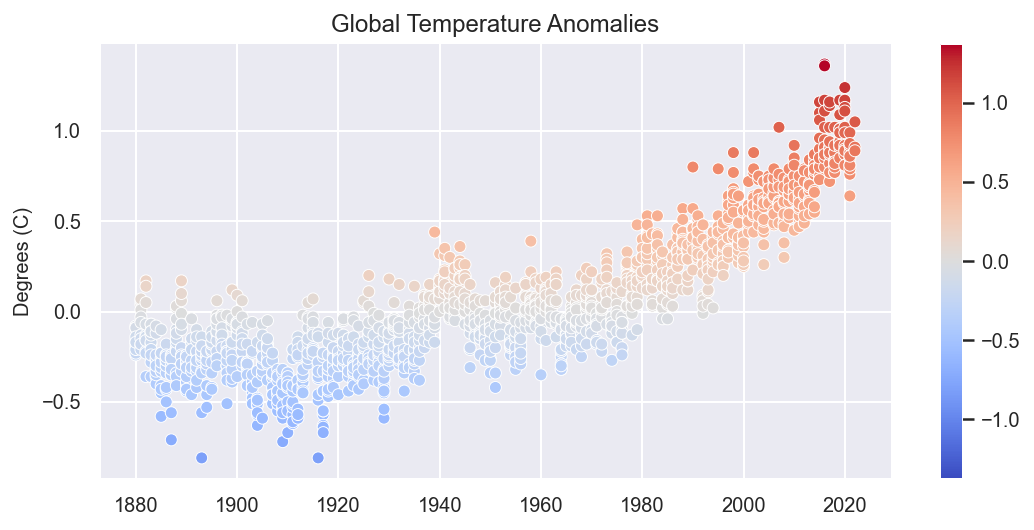

In [135]:
divnorm = colors.TwoSlopeNorm(vmin=dfgt['Anomaly'].max()*-1,
                              vcenter=0.,
                              vmax=dfgt['Anomaly'].max())
g = sns.relplot(
    kind="scatter", height=4, aspect=2,
    data=dfgt, x='Year', y='Anomaly',hue='Anomaly', legend=False, palette="coolwarm", hue_norm=divnorm)
g.set(title="Global Temperature Anomalies", xlabel="", ylabel="Degrees (C)")

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=divnorm)
for ax in g.axes.flat:
    ax.figure.colorbar(sm)

### line plot

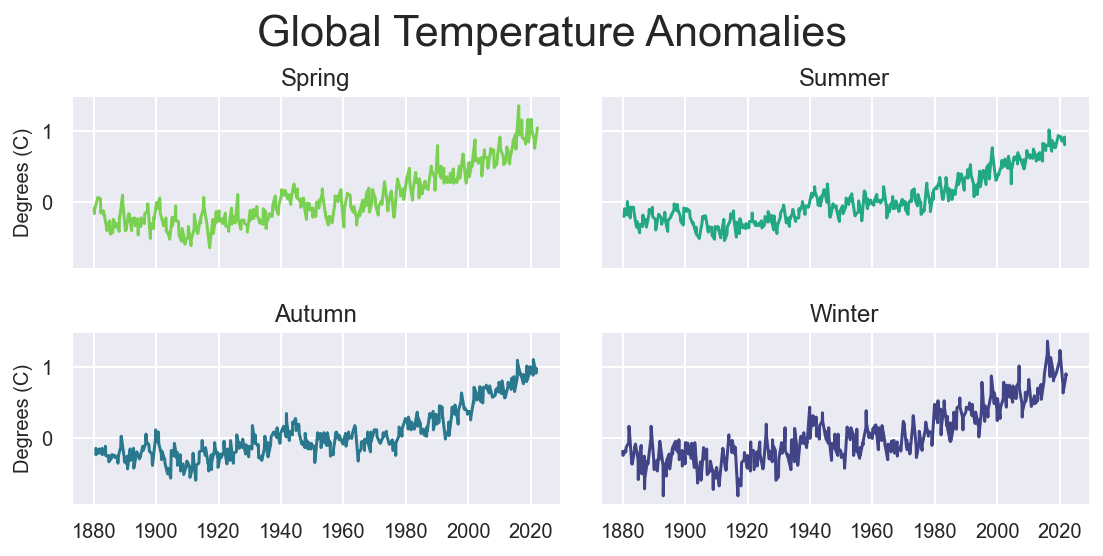

In [136]:
g = sns.relplot(
    kind="line", height=2, aspect=2,
    data=dfgt, x='Date', y='Anomaly',
    hue='Season', hue_order=seasons,
    palette=seaborn_viridis_palette,
    col='Season', col_wrap=2, legend=False)
g.set(xlabel='', ylabel = "Degrees (C)");
g.fig.suptitle('Global Temperature Anomalies', y=1.03);
for col_key, ax in g.axes_dict.items():
    ax.set_title(col_key)

### bar plot

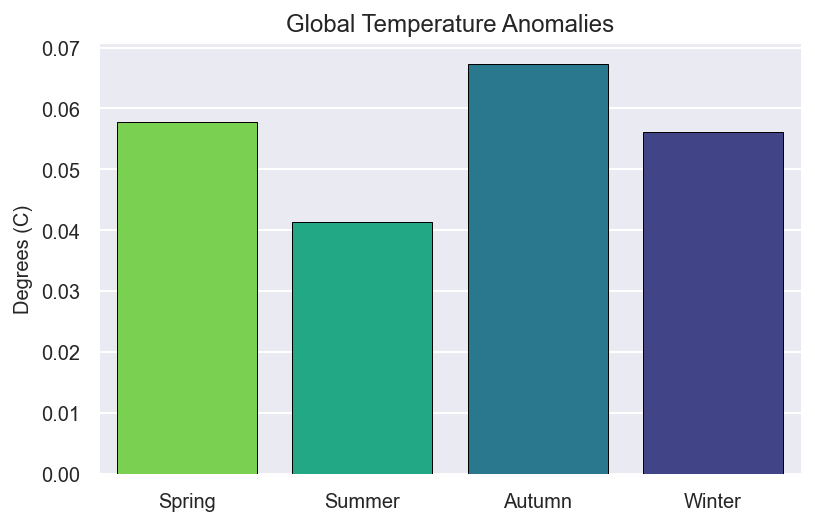

In [137]:
g = sns.catplot(
    kind="bar", height=4, aspect=1.5,
    data=dfgt, x='Season', y='Anomaly',
    ci=None, edgecolor = 'black', saturation=1.0, lw=0.5,
    order=seasons, palette=seaborn_viridis_palette, legend=False)
g.set(title = "Global Temperature Anomalies", xlabel="", ylabel = "Degrees (C)")

### boxplots

In [138]:
dfgt.head()

,Id,Year,Season,Month,Anomaly
Date,,,,,
1880-01-01,GLB,1880,Winter,Jan,-0.18
1880-02-01,GLB,1880,Winter,Feb,-0.24
1880-03-01,GLB,1880,Spring,Mar,-0.08
1880-04-01,GLB,1880,Spring,Apr,-0.16
1880-05-01,GLB,1880,Spring,May,-0.09


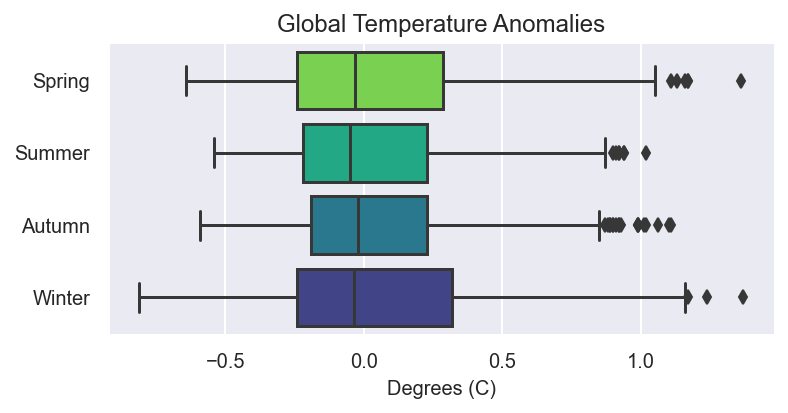

In [139]:
sns.set_style('darkgrid')

g = sns.catplot(
    kind="box", height=3, aspect=2,
    data=dfgt, y='Season', x='Anomaly',
    palette=seaborn_viridis_palette, saturation=1.0,
    )
g.set(title = "Global Temperature Anomalies", ylabel="", xlabel = "Degrees (C)")   

### histograms

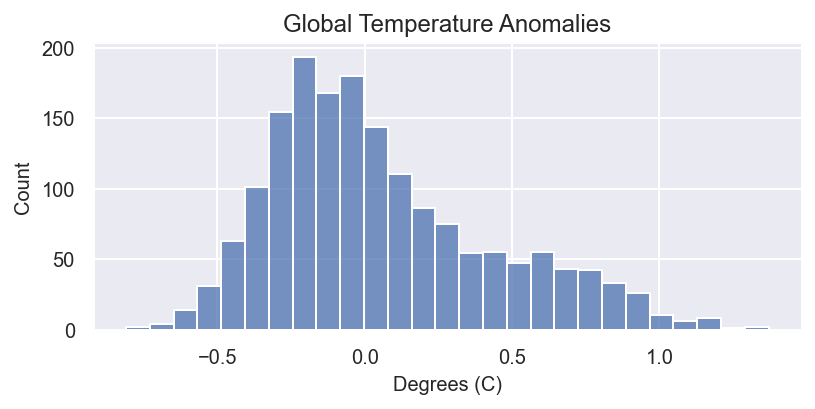

In [140]:
g = sns.displot(
    kind="hist", height=3, aspect=2,
    data=dfgt, x='Anomaly')
g.set(title = "Global Temperature Anomalies",  xlabel = "Degrees (C)")  

<a id='pd-export'></a>
## Export

[Return to Start of Notebook](#pd)  

In [141]:
save_path = os.path.join(save_dir, 'global_temp_anomalies_10yr.csv')
dfgt10y.to_csv(save_path, header=True, index=True, sep=',')